<a href="https://colab.research.google.com/github/roseleen-kaur/DataAnalytics_2022_Summer/blob/main/R_Kaur_Project2_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quiz 2#
Roseleen Kaur 

<small> I used the Udemy for help<small>

#DATA SUMMARY#

###Attribute [Info](https://archive.ics.uci.edu/ml/datasets/Automobile)###
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.



#EDA#
##Checking Data and Changing Data Types##

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('https://raw.githubusercontent.com/roseleen-kaur/DataAnalytics_2022_Summer/main/imports-85.data', 
                 names = ['Symboling', 'Normalized- Losses', 'Make', 'Fuel Type','Aspiration', 'Num of Doors',
                          'Body Style', 'Drive-Wheels', 'Engine Location', 'Wheel- Base', 'Length','Width','Height', 'Curb Weight', 
                          'Engine- Type', '# Cylinders','Engine- Size','Fuel System', 'Bore','Stroke', 'Compression- Ratio', 'Horse-Power', 'Peak RPM',
                          'City MPG','Highway MPG', 'Price'])
#store a copy of original 
original_df = df



df.head()

,Symboling,Normalized- Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive-Wheels,Engine Location,Wheel- Base,Length,Width,Height,Curb Weight,Engine- Type,# Cylinders,Engine- Size,Fuel System,Bore,Stroke,Compression- Ratio,Horse-Power,Peak RPM,City MPG,Highway MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Then we check to see if there are any null values.
As you can see there are none.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
Wheel- Base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
Length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
Width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
Height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
Curb Weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
Engine- Size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
Compression- Ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
City MPG,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
Highway MPG,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [8]:
#do isnull().sum(), nuique() and info all in one code block, easier to access.
#there will be data types, count, zeros, '?' and unique all in one table for all
#attributes
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])

df_info['NUnique'] = df.nunique()
df_info['Missing Vals'] = df.isnull().sum()
df_info['Count'] = df.count()
df_info['Zeros'] = (df==0).sum()
df_info['?'] = (df=='?').sum()


df_info


,Dtype,NUnique,Missing Vals,Count,Zeros,?
Symboling,int64,6,0,205,67,0
Normalized- Losses,object,52,0,205,0,41
Make,object,22,0,205,0,0
Fuel Type,object,2,0,205,0,0
Aspiration,object,2,0,205,0,0
Num of Doors,object,3,0,205,0,2
Body Style,object,5,0,205,0,0
Drive-Wheels,object,3,0,205,0,0
Engine Location,object,2,0,205,0,0
Wheel- Base,float64,53,0,205,0,0


From the table above we can see that in the original data there are 4 int64, 16 object, and 5 float64 type features. There are missing values in any of the columns, but there are 67 zeroes in 'Symboling'. Along with that there are 41 '?' in 'Normalized- Losses, 2 in 'Num of Doors' , 'Horse-Power', and 'Peak RPM', and 4 in 'Bore', 'Stroke, and 'Price'.

We also have to identify which columns are categorical and numberical so we can know how to feature scale our data to use for a machine learning algorithm.


In [9]:
num_features = []
cat_features =[]
#so we create 2 empty lists and depending on the data type
#they will go into one or the other.
for i in df.columns:
  if df[i].dtype == 'object':
    cat_features.append(i)
  else:
    num_features.append(i)
print(f'Numerical Features:\n {num_features}')
print(f'Categorical Features:\n {cat_features}')

Numerical Features:
 ['Symboling', 'Wheel- Base', 'Length', 'Width', 'Height', 'Curb Weight', 'Engine- Size', 'Compression- Ratio', 'City MPG', 'Highway MPG']
Categorical Features:
 ['Normalized- Losses', 'Make', 'Fuel Type', 'Aspiration', 'Num of Doors', 'Body Style', 'Drive-Wheels', 'Engine Location', 'Engine- Type', '# Cylinders', 'Fuel System', 'Bore', 'Stroke', 'Horse-Power', 'Peak RPM', 'Price']


From the informaiton above we can see that 
```
['Normalized- Losses', 'Make', 'Fuel Type', 'Aspiration', 'Num of Doors', 'Body Style', 
'Drive-Wheels', 'Engine Location', 'Engine- Type', '# Cylinders', 'Fuel System', 'Bore', 
'Stroke', 'Horse-Power', 'Peak RPM', 'Price']
```
are all Categorical Data types and 
```
['Symboling', 'Wheel- Base', 'Length', 'Width', 'Height', 'Curb Weight', 'Engine- Size',
'Compression- Ratio', 'City MPG', 'Highway MPG']
```
are Numerical Data Types

###Creating Numerical Data Visuals###
Here we are going to visualize the data shown in the numerical data.


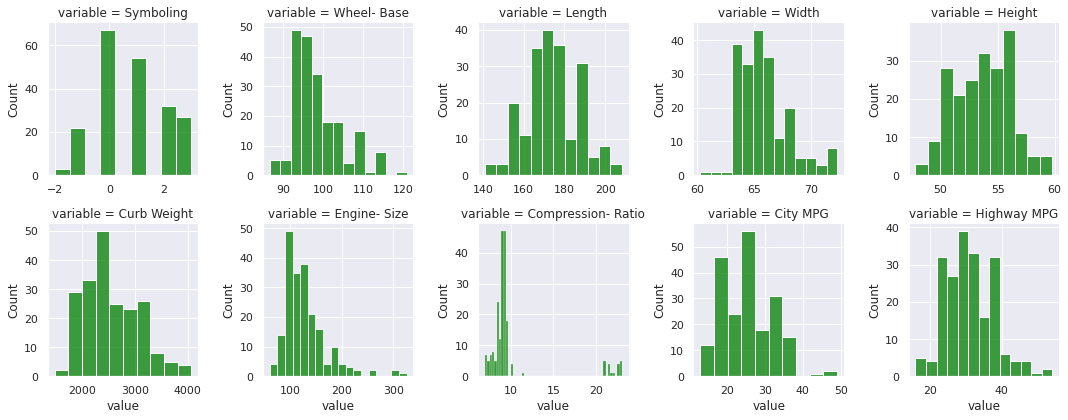

In [10]:
import warnings
warnings.filterwarnings("ignore")
num_data = pd.melt(df[num_features])
n1 = sns.FacetGrid (num_data, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
n1 = n1.map(sns.histplot, 'value', color = 'green')
n1

Observations: Compression ratio graph is a little weird. We can also see that alot of cars Symboling is on the risky side rather than the safer side. 

###Categorical Data Visualizations###


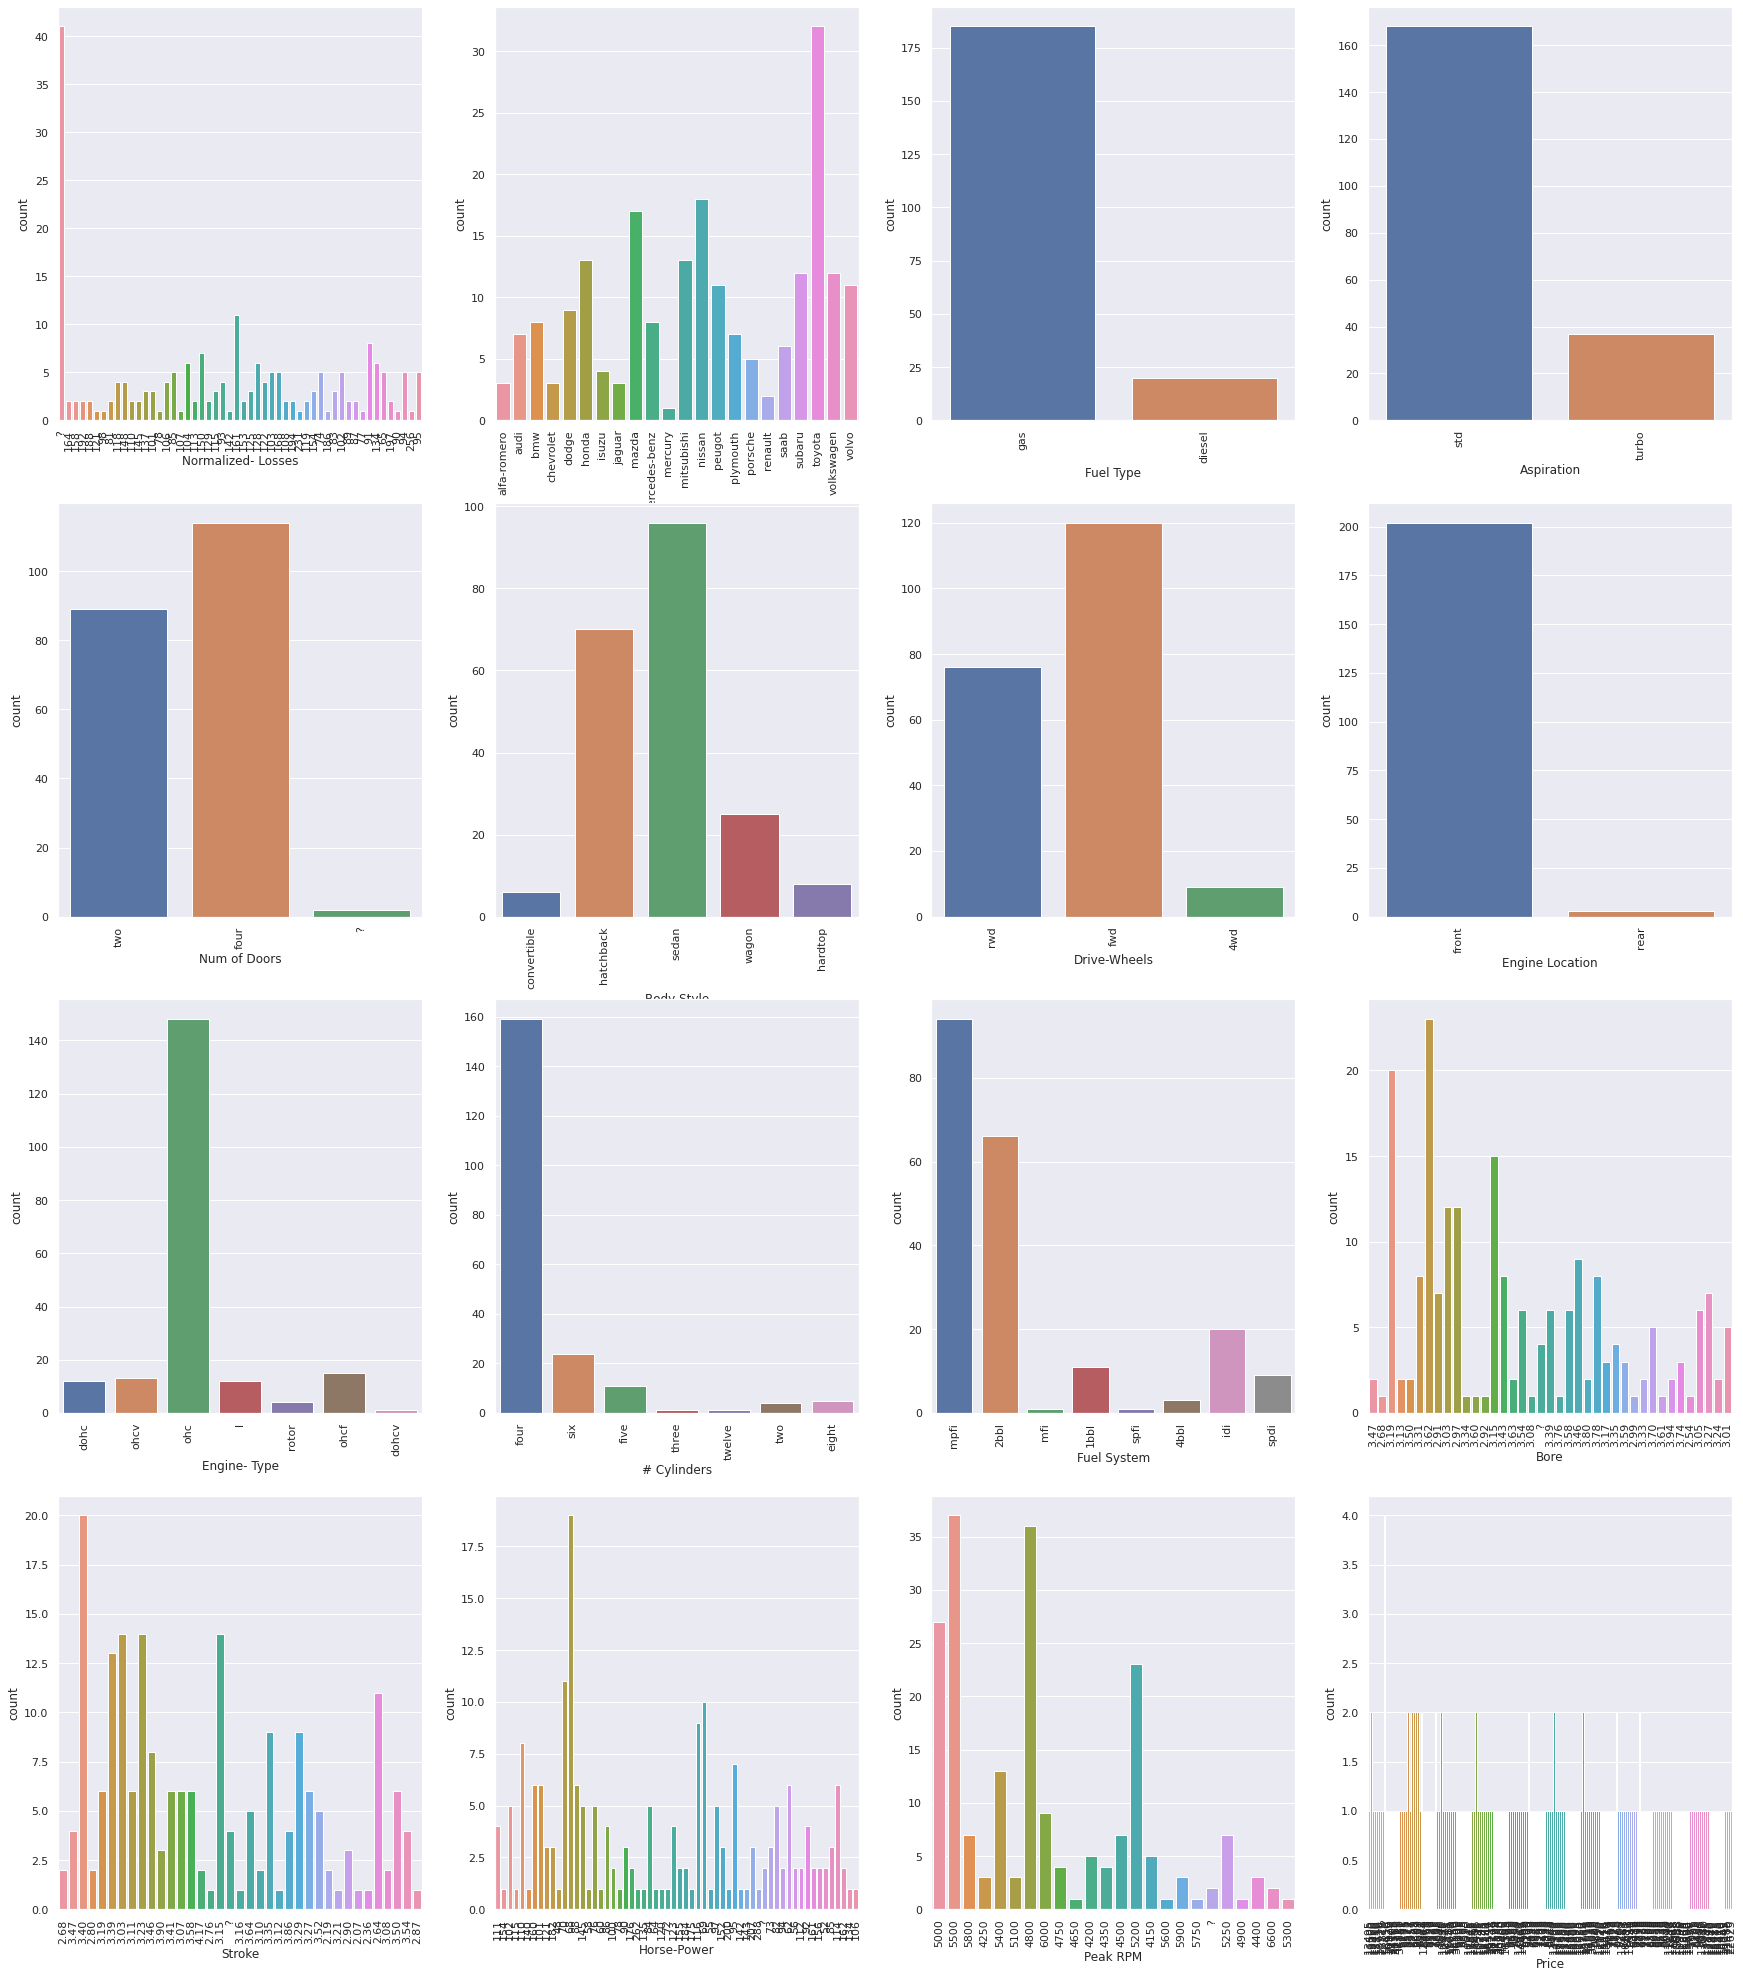

In [11]:
fig, ax = plt.subplots(4,4, figsize=(30,35))
for variable, subplot in zip(cat_features, ax.flatten()):
  sns.countplot(df[variable], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)

#Missing Data#

In [12]:
#replace all '?' with Na
df_new = df.replace('?', np.NaN)
#check to see if it worked by making a sum of hte missing data
miss = df_new.isnull().sum()
miss = miss[miss>0]
miss.sort_values(inplace = True)
miss

Num of Doors           2
Horse-Power            2
Peak RPM               2
Bore                   4
Stroke                 4
Price                  4
Normalized- Losses    41
dtype: int64

Here we can see the 7 columns that have missing data, and we also replaced all of the ? with NaN.

Now we check the number of completed rows without missing values.

In [13]:
df_new.shape[0] - df_new.isnull().sum(axis =0).shape[0]

179

Using the missingo function we create a chart to show the percentage of missing data.

Text(0.5, 1.0, '% Missing')

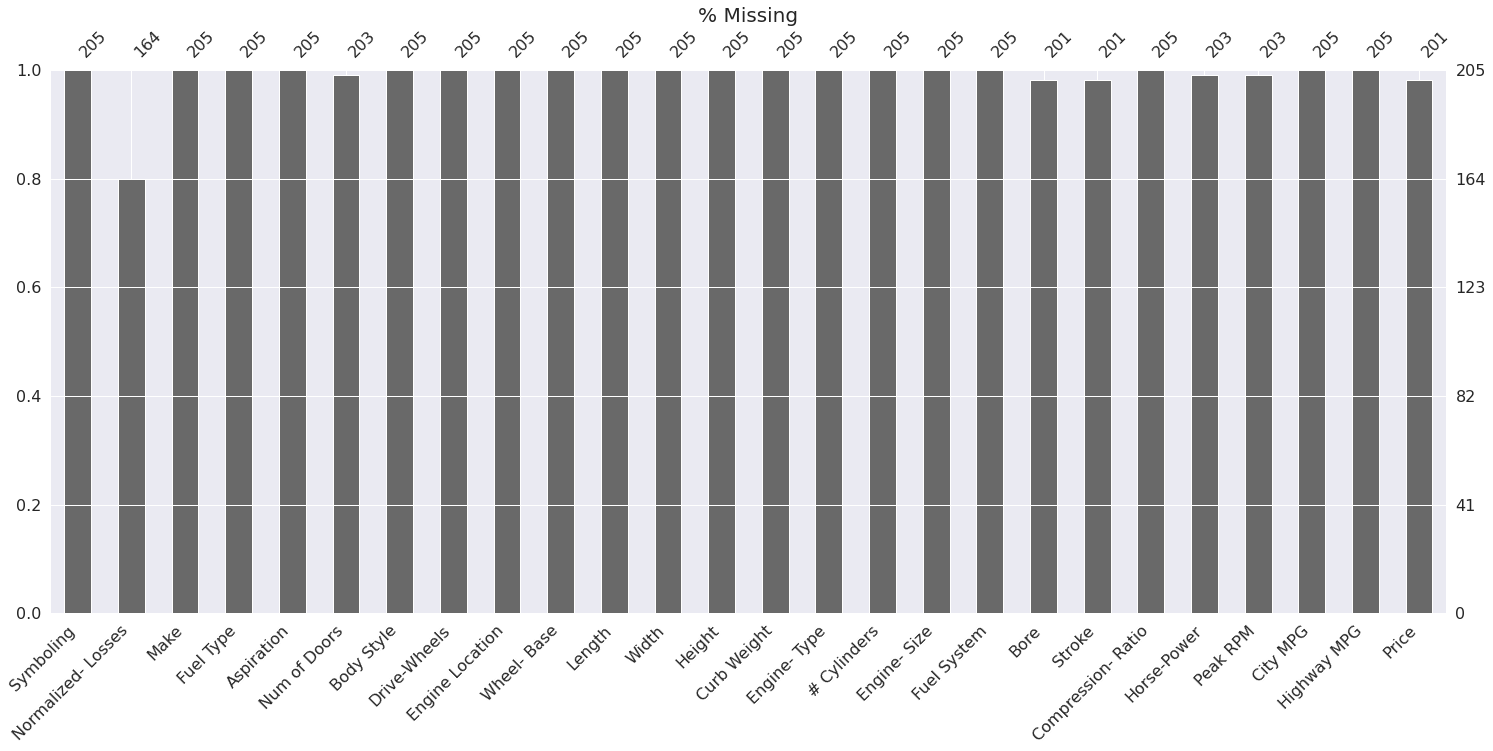

In [14]:
msno.bar(df_new)
plt.title('% Missing', fontsize = 20)


- There are 179 with complete data, no missing values
- Bore, Stroke, and Price have almost the same amount of missing values around 40% since they has 4 NaNs.
- Num of Doors, Horse-Power, Peak RPM have about 20%
- Normalized Losses has the most missing.

##Fixing Data Types##
Now we have to go in and fix the data types for some of the features.


In [15]:
#turned all of the object data type to float
df_new [['Bore', 'Stroke']] = df_new [['Bore', 'Stroke']].astype('float')
df_new[['Normalized- Losses', 'Horse-Power', 'Price', 'Peak RPM']] = df_new[['Normalized- Losses', 'Horse-Power', 'Price', 'Peak RPM']].astype('float')

In [16]:
#turn symboling to string
df_new[['Symboling']] = df_new[['Symboling']].astype('string')

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symboling           205 non-null    string 
 1   Normalized- Losses  164 non-null    float64
 2   Make                205 non-null    object 
 3   Fuel Type           205 non-null    object 
 4   Aspiration          205 non-null    object 
 5   Num of Doors        203 non-null    object 
 6   Body Style          205 non-null    object 
 7   Drive-Wheels        205 non-null    object 
 8   Engine Location     205 non-null    object 
 9   Wheel- Base         205 non-null    float64
 10  Length              205 non-null    float64
 11  Width               205 non-null    float64
 12  Height              205 non-null    float64
 13  Curb Weight         205 non-null    int64  
 14  Engine- Type        205 non-null    object 
 15  # Cylinders         205 non-null    object 
 16  Engine- 

In [18]:
#We ma de a new copy here so we can use it to find what value to plug in for number of doors NaN
df_copy_new = df_new.copy()


In [23]:
df_copy_new[df_copy_new['Num of Doors'].isnull()]
#these are the two rows where the door count is NaN

,Symboling,Normalized- Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive-Wheels,Engine Location,Wheel- Base,Length,Width,Height,Curb Weight,Engine- Type,# Cylinders,Engine- Size,Fuel System,Bore,Stroke,Compression- Ratio,Horse-Power,Peak RPM,City MPG,Highway MPG,Price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


Now check some stats to see what number can be plugged into those two rows.

In [28]:
df_copy_new['Num of Doors'].mode()
#over here it shows that the most frequent number is 4
#so we cna plug that into the 2 missing rows.

0    four
dtype: object

In [31]:
df_copy_new['Num of Doors'] = df_copy_new['Num of Doors'].fillna('four')

In [33]:
#Check to see if it worked
miss = df_copy_new.isnull().sum()
miss = miss[miss>0]
miss.sort_values(inplace = True)
miss
#it did

Horse-Power            2
Peak RPM               2
Bore                   4
Stroke                 4
Price                  4
Normalized- Losses    41
dtype: int64

NOTE:
I realize this is horrendous, and that I didn't even do any of the questions. I took them out because my answers didn't make sense. THe only thing I have to say is that its taking me a little too long to understand the conepts and I am out of time. 